# Análisis de datos globales

En el presente se analizan las información sobre COVID-19 registrada por diferentes países

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1589311531281_0008,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
spark = SparkSession.builder.appName('proyectoBigdata').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
confirmed = spark.read.csv('s3://bigdatacovid/Global/confirmed_narrow.csv', inferSchema=True, header=True)
deaths = spark.read.csv('s3://bigdatacovid/Global/deaths_narrow.csv', inferSchema=True, header=True)
recovered = spark.read.csv('s3://bigdatacovid/Global/recovered_narrow.csv', inferSchema=True, header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Casos confirmados

In [4]:
from pyspark.sql import functions as f
from pyspark.sql import DataFrameNaFunctions
from pyspark.sql.functions import col, max as max_pyspark

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Información general acerca del dataset

El dataset de casos confirmados contiene las siguientes columnas:

In [5]:
print(confirmed.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Value', 'ISO 3166-1 Alpha 3-Codes', 'Region Code', 'Sub-region Code', 'Intermediate Region Code']

#### Numero de datos:

In [6]:
print('Cantidad de registros: {}'.format((confirmed.count())))
print('Cantidad de países registrados: {}'.format(confirmed.select('Country/Region').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cantidad de registros: 29527
Cantidad de países registrados: 188

### Top 10 de países con mayor número de casos

In [7]:
confirmed.withColumn('Value', col('Value').cast("int")).groupBy('Country/Region').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Value)|
+--------------+----------+
|            US|   1347881|
|         Spain|    227436|
|United Kingdom|    223060|
|        Russia|    221344|
|         Italy|    219814|
|        France|    175479|
|       Germany|    172576|
|        Brazil|    169594|
|        Turkey|    139771|
|          Iran|    109286|
+--------------+----------+
only showing top 10 rows

### Top 10 de países con menor número de casos

In [8]:
confirmed.withColumn('Value', col('Value').cast("int")).groupBy('Country/Region').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+
|  Country/Region|max(Value)|
+----------------+----------+
|  Western Sahara|         6|
|      Mauritania|         8|
|Papua New Guinea|         8|
|          Bhutan|         9|
|      MS Zaandam|         9|
|        Suriname|        10|
|         Comoros|        11|
|      Seychelles|        11|
|        Holy See|        12|
|         Burundi|        15|
+----------------+----------+
only showing top 10 rows

### Número total de casos confirmados

In [9]:
total_confirmed_per_country = confirmed.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_pyspark("Value"))
total_confirmed = total_confirmed_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_confirmed = total_confirmed[0]['sum(max(Value))']
print("Número total de casos en el mundo: {}".format(total_confirmed))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Número total de casos en el mundo: 4123581

In [10]:
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

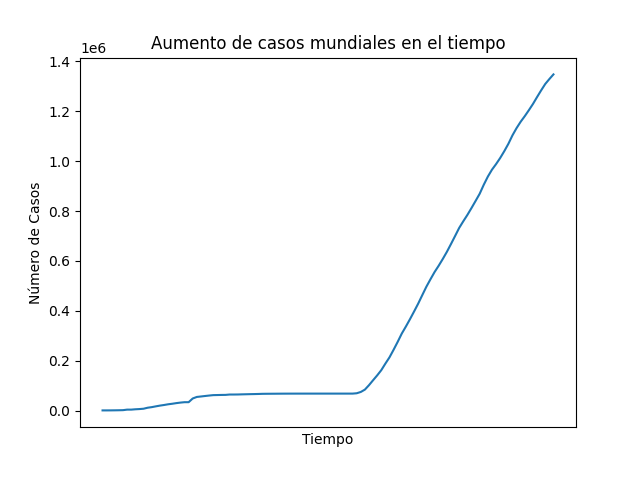

In [12]:
fig, ax = plt.subplots()

total_confirmed_per_date = confirmed.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')

dates = total_confirmed_per_date.toPandas()['Date'].values.tolist()
cases = total_confirmed_per_date.toPandas()['max(Value)'].values.tolist()
ax.plot(dates, cases)
ax.set(xlabel='Tiempo', ylabel='Número de Casos',
       title='Aumento de casos mundiales en el tiempo')
plt.xticks([])
%matplot plt

## Muertes

### Información general acerca del dataset

El dataset de muertes contiene las siguientes columnas:

In [13]:
print(deaths.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Value', 'ISO 3166-1 Alpha 3-Codes', 'Region Code', 'Sub-region Code', 'Intermediate Region Code']

#### Numero de datos:

In [14]:
print('Cantidad de registros: {}'.format((deaths.count())))
print('Cantidad de países registrados: {}'.format(deaths.select('Country/Region').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cantidad de registros: 29527
Cantidad de países registrados: 188

### Top 10 de países con mayor número de muertes

In [15]:
deaths.withColumn('Value', col('Value').cast("int")).groupBy('Country/Region').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Value)|
+--------------+----------+
|            US|     80682|
|United Kingdom|     32065|
|         Italy|     30739|
|         Spain|     26744|
|        France|     26604|
|        Brazil|     11653|
|       Belgium|      8707|
|       Germany|      7661|
|          Iran|      6685|
|   Netherlands|      5456|
+--------------+----------+
only showing top 10 rows

### Número total de muertes en el mundo

In [17]:
total_deaths_per_country = deaths.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_pyspark("Value"))
total_deaths = total_deaths_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_deaths = total_deaths[0]['sum(max(Value))']
print("Número total de muertes en el mundo: {}".format(total_deaths))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Número total de muertes en el mundo: 283920

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

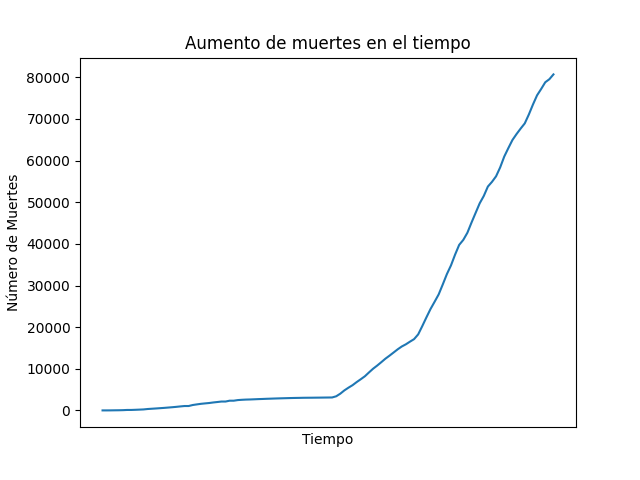

In [18]:
fig, ax = plt.subplots()

total_deaths_per_date = deaths.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')

dates = total_deaths_per_date.toPandas()['Date'].values.tolist()
deaths = total_deaths_per_date.toPandas()['max(Value)'].values.tolist()
ax.plot(dates, deaths)
ax.set(xlabel='Tiempo', ylabel='Número de Muertes',
       title='Aumento de muertes en el tiempo')
plt.xticks([])
%matplot plt

## Recuperados

### Información general acerca del dataset

El dataset de casos recuperados contiene las siguientes columnas:

In [19]:
print(recovered.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Value', 'ISO 3166-1 Alpha 3-Codes', 'Region Code', 'Sub-region Code', 'Intermediate Region Code']

#### Numero de datos:

In [20]:
print('Cantidad de registros: {}'.format((recovered.count())))
print('Cantidad de países registrados: {}'.format(recovered.select('Country/Region').distinct().count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cantidad de registros: 27973
Cantidad de países registrados: 188

### Top 10 de países con mayor número de recuperados

In [21]:
recovered.withColumn('Value', col('Value').cast("int")).groupBy('Country/Region').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Value)|
+--------------+----------+
|            US|    232733|
|       Germany|    145617|
|         Spain|    137139|
|         Italy|    106587|
|        Turkey|     95780|
|          Iran|     87422|
|        Brazil|     67384|
|         China|     64435|
|        France|     55569|
|        Russia|     39801|
+--------------+----------+
only showing top 10 rows

### Número total de recuperados en el mundo

In [22]:
total_recovered_per_country = recovered.withColumn("Value", col("Value").cast("int")).groupBy("Country/Region").agg(max_pyspark("Value"))
total_recovered = total_recovered_per_country.withColumn("max(Value)", col("max(Value)").cast("int")).groupBy().agg(f.sum("max(Value)")).collect()
total_recovered = total_recovered[0]['sum(max(Value))']
print("Número total de muertes en el mundo: {}".format(total_deaths))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Número total de muertes en el mundo: 283920

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

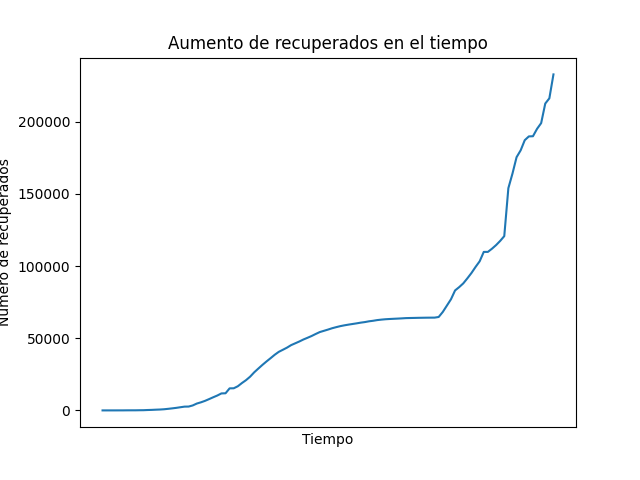

In [23]:
fig, ax = plt.subplots()

total_recovered_per_date = recovered.withColumn('Value', col('Value').cast("int")).groupBy('Date').agg(max_pyspark('Value')).orderBy('max(Value)', ascending=True).na.drop('any')

dates = total_recovered_per_date.toPandas()['Date'].values.tolist()
recovered = total_recovered_per_date.toPandas()['max(Value)'].values.tolist()
ax.plot(dates, recovered)
ax.set(xlabel='Tiempo', ylabel='Número de recuperados',
       title='Aumento de recuperados en el tiempo')
plt.xticks([])
%matplot plt